# ECON 220 Lab Week 5

Justin S. Eloriaga

Today, our goal is to talk about the binomial and the normal distributions more clearly, two very common distributions that we encounter in real life. We will also talk more data management things using the World Happiness Index Survey Data for the year 2020. This can be found here: https://github.com/MainakRepositor/Datasets/blob/master/World%20Happiness%20Data/2020.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 5/happiness_2020.csv"

data = pd.read_csv(path)
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


As you can see, the variable names are quite long and hard to decipher. Let us rename these to shorter ones. To do this in Python is straightforward

In [6]:
data.rename(columns={
    'Country name': 'Country',
    'Regional indicator': 'Region',
    'Ladder score': 'Score',
    'Standard error of ladder score': 'StdErr',
    'upperwhisker': 'UpperWhisker',
    'lowerwhisker': 'LowerWhisker',
    'Logged GDP per capita': 'GDP',
    'Social support': 'SocialSupport',
    'Healthy life expectancy': 'LifeExpectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption',
    'Ladder score in Dystopia': 'DystopiaScore',
    'Explained by: Log GDP per capita': 'GDP',
    'Explained by: Social support': 'SocialSupport',
    'Explained by: Healthy life expectancy': 'LifeExpectancy',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Corruption',
    'Dystopia + residual': 'DystopiaResidual'
}, inplace=True)

data.head()

,Country,Region,Score,StdErr,UpperWhisker,LowerWhisker,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,DystopiaScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,DystopiaResidual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Let us try to see the average score per region

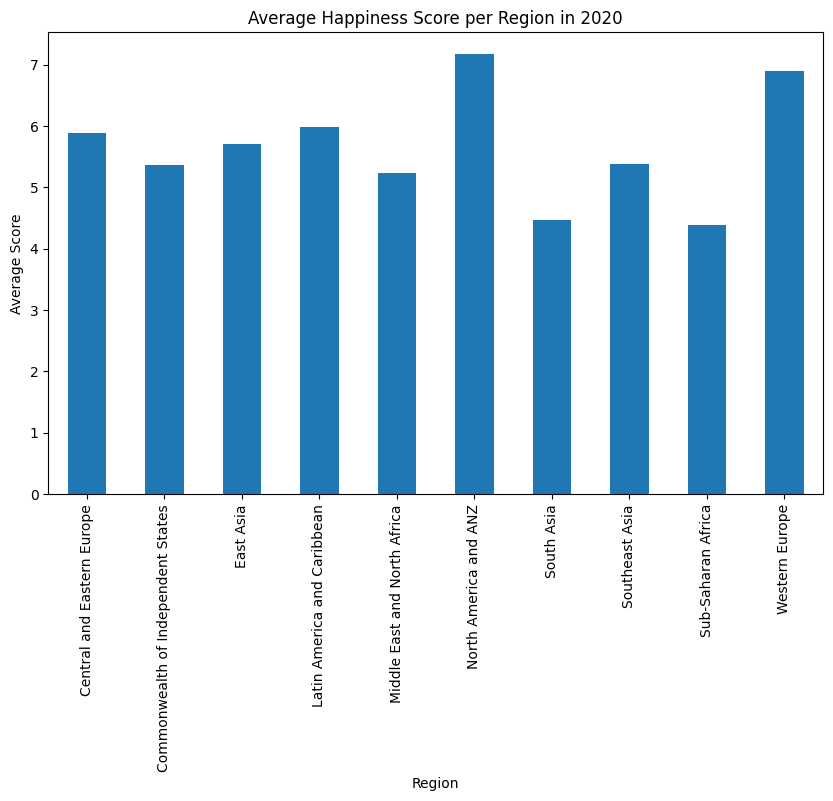

In [7]:
# Calculate the average score per region
average_score_per_region = data.groupby('Region')['Score'].mean()

# Plot the bar graph
average_score_per_region.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.title('Average Happiness Score per Region in 2020')
plt.show()

We can see that, on average, the highest happiness index can be found in North America and ANZ while the lowest on average is in South Asia

Next, let us observe some values that are peculiar. For one, we shouldn't really have values that are zeros in there. Let us see if there are rows or observations with zero.

In [23]:
# Find rows with any zero values
rows_with_zeros = data[(data == 0).any(axis=1)]

# Print the rows with zero values
rows_with_zeros

,Country,Region,Score,StdErr,UpperWhisker,LowerWhisker,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,DystopiaScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,DystopiaResidual
76,Greece,Western Europe,5.5150,0.046932,5.606986,5.423014,10.132326,0.814380,72.405258,0.541345,-0.300907,0.859931,1.972317,1.128070,1.168974,0.979432,0.173516,0.000000,0.048844,2.016179
95,Bulgaria,Central and Eastern Europe,5.1015,0.044221,5.188173,5.014827,9.869319,0.937840,66.803978,0.745178,-0.143908,0.935585,1.972317,1.046555,1.460579,0.777777,0.417820,0.103834,0.000000,1.294961
139,Burundi,Sub-Saharan Africa,3.7753,0.107122,3.985260,3.565340,6.492642,0.490326,53.400002,0.626350,-0.017552,0.606935,1.972317,0.000000,0.403575,0.295213,0.275399,0.187402,0.212187,2.401507
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


Sometimes, these may be viewed as outliers. In this dataset, that is not necessarily the case, but this too low of a value may potentially affect our analysis. Hence, let us drop these countries from our dataset. 

In [24]:
# Drop rows with any zero values
data_cleaned = data[(data != 0).all(axis=1)]

# Display the cleaned data
data_cleaned

,Country,Region,Score,StdErr,UpperWhisker,LowerWhisker,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,DystopiaScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,DystopiaResidual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241
147,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031


### Optional (If Time Permits): World Heatmap

We need to install two additional libraries

In [ ]:
pip install plotly
pip install nbformat

Just some more datacleaning

In [ ]:
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()].copy()

In [ ]:
import plotly.express as px
import plotly.io as pio

# Set the renderer for VS Code Jupyter
pio.renderers.default = "browser"

# Generate choropleth map
fig = px.choropleth(
    data_cleaned,
    locations="Country",  
    locationmode="country names",  
    color="Score",        
    hover_name="Country",  
    color_continuous_scale="viridis",  
    title="World Happiness Score Heatmap"
)

# Display the map 
fig.show()

## Normal Distribution

Let us zero in on the distribution for Latin America and the Caribbean. Note that data_cleaned = data for this region since no Latin America or Caribbean country was in list of rows deleted.

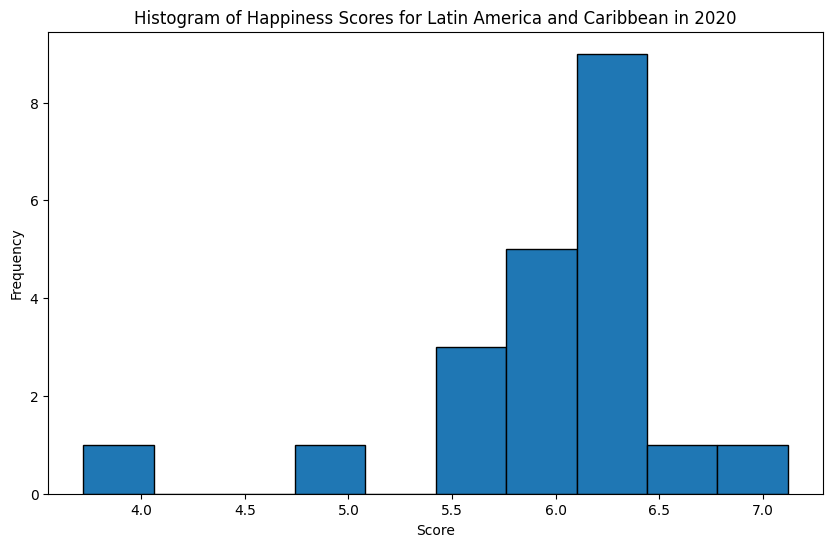

In [16]:
# Filter data for Latin America and Caribbean
lac_data = data[data['Region'] == 'Latin America and Caribbean']

# Generate a histogram of scores
plt.figure(figsize=(10, 6))
plt.hist(lac_data['Score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Happiness Scores for Latin America and Caribbean in 2020')
plt.show()

Clearly, this distribution appears to be non-normal. We can check this using a variety of commands that fall under the $\texttt{statsmodels}$ and $\texttt{scipy}$ libraries. Be sure to install this first.

In [ ]:
%pip install statsmodels
%pip install scipy

Graphically, we can generate a QQ plot to determine if the distribution of score is close to normal

<Figure size 640x480 with 0 Axes>

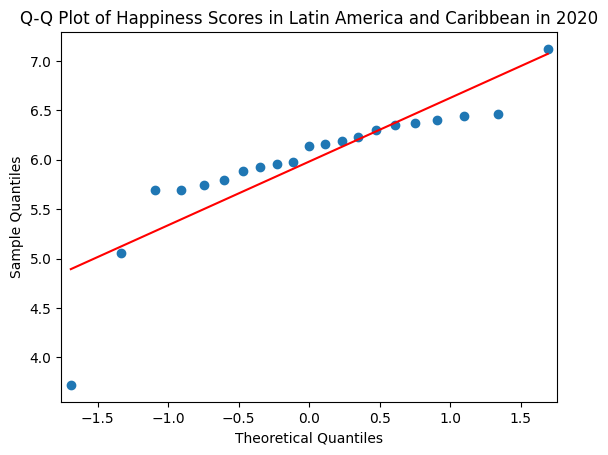

In [17]:
import statsmodels.api as sm

# Generate a Q-Q plot
plt.figure()
sm.qqplot(lac_data['Score'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Happiness Scores in Latin America and Caribbean in 2020')
plt.show()

The distribution is not perfectly normal but it's the closest we've got. Let us use this as some baseline

Suppose I posit this question: $\textbf{What is the probability that a Latin American country has a score below or equal 6}$?

To answer this question, we need first two key ingredients (1) the mean and (2) the standard deviation

In [18]:
# Calculate the mean and standard deviation of the score for Latin American countries
mean_score_lac = lac_data['Score'].mean()
std_score_lac = lac_data['Score'].std()

print(f"Mean Score for Latin American countries: {mean_score_lac}")
print(f"Standard Deviation of Score for Latin American countries: {std_score_lac}")

Mean Score for Latin American countries: 5.981785706095239
Standard Deviation of Score for Latin American countries: 0.6602131810928923


Now with this, we can answer the question

In [19]:
from scipy.stats import norm

# Calculate the probability
probability_below_6 = norm.cdf(6, mean_score_lac, std_score_lac)

print(f"The probability that a Latin American country has a score below 6 is {probability_below_6:.4f}")

The probability that a Latin American country has a score below 6 is 0.5110


How does this compare to the actual data? Well, it is straightforward enough to find out

In [20]:
# Count the number of Latin American countries with a score below 6
actual_count_below_6 = lac_data[lac_data['Score'] < 6].shape[0]

# Total number of Latin American countries
total_lac_countries = lac_data.shape[0]

# Calculate the actual probability
actual_probability_below_6 = actual_count_below_6 / total_lac_countries

print(f"Actual probability that a Latin American country has a score below 6 is {actual_probability_below_6:.4f}")

Actual probability that a Latin American country has a score below 6 is 0.4762


Close enough!

## Binomial Distribution

We know that the probability that a Latin American and Carribean country has a score less than or equal to 6 is 0.5110. From here, by simple probability probabilities, the probability that a Latin American and Carribean country has a score greater than 6 is 0.489. 

Suppose we want to experiment on a sample of 6 countries and want to know the likelihood that the country has a score greater than 6.

We can do this with the $\textbf{Binomal Distribution}$. However, we need to bear in mind the following assumptions. 

(1) Countries are assumed to be independent from each other, (2) There is a fixed number of countries, (3) A country can have a score greater than 6 or less than or equal to 6 [i.e. two possible outcomes], and (4) Each country is equally likely to be chosen in the sample

In [21]:
from scipy.stats import binom

# Probability that a country has a score greater than 6
prob_greater_than_6 = 1 - probability_below_6

# Number of trials (countries)
n = 7

# Number of successes (countries with score greater than 6)
k = 5

# Calculate the probability using the binomial distribution
probability_5_out_of_7 = binom.pmf(k, n, prob_greater_than_6)

print(f"The probability that exactly 5 out of 7 countries in the LAC region have a score greater than 6 is {probability_5_out_of_7:.4f}")

The probability that exactly 5 out of 7 countries in the LAC region have a score greater than 6 is 0.1533
